In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from util import parse

for review in parse("Sports_and_Outdoors_5.json.gz"):
    print(review)
    break
    
count = 0
for review in parse("Sports_and_Outdoors_5.json.gz"):
    count += 1
print('\nnumber of reviews:', count)

{'overall': 5.0, 'verified': True, 'reviewTime': '06 3, 2015', 'reviewerID': 'A180LQZBUWVOLF', 'asin': '0000032034', 'reviewerName': 'Michelle A', 'reviewText': 'What a spectacular tutu! Very slimming.', 'summary': 'Five Stars', 'unixReviewTime': 1433289600}

number of reviews: 2839940


In [10]:
unixReviewTime = []
reviewTime = []
ratings = []
#reviewText = []
#reviewerID = []
#productID = []

for review in parse("Sports_and_Outdoors_5.json.gz"):
    unixReviewTime.append(review['unixReviewTime'])
    reviewTime.append(review['reviewTime'])
    ratings.append(int(review['overall']))
    #reviewText.appendnd(review['reviewText'])
    #reviewerID.appendnd(review['reviewerID'])
    #productID.appendnd(review['asin'])
    

Text(0.5, 0, 'Rating')

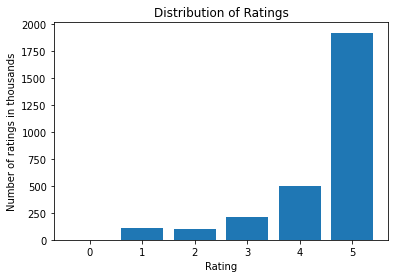

In [18]:
# the distribution of ratings
ratingDist = np.zeros(6)
for r in ratings:
    ratingDist[r] += 1
    
# ploting the bar chart
plt.bar(np.arange(6), ratingDist//1000)
plt.title('Distribution of Ratings')
plt.ylabel('Number of ratings in thousands')
plt.xlabel('Rating')

In [44]:
# Review times
from util import convertTime

numReviews = len(unixReviewTime)
unixReviewTime.sort()
trainThres = unixReviewTime[int(numReviews*0.8)]
devThres = unixReviewTime[int(numReviews*0.9)]

print('Training set (80%): from', convertTime(unixReviewTime[0]), 'to', 
      convertTime(trainThres))
print('Dev set (10%): from', convertTime(trainThres), 'to', 
      convertTime(devThres))
print('Test set (10%): from', convertTime(devThres), 'to', 
      convertTime(unixReviewTime[-1]))

Training set (80%): from 2000-09-14 17:00:00 to 2017-03-27 17:00:00
Dev set (10%): from 2017-03-27 17:00:00 to 2017-10-17 17:00:00
Test set (10%): from 2017-10-17 17:00:00 to 2018-10-03 17:00:00


In [39]:
# saving as train dev test sets
train = []
dev = []
test = []

#unixReviewTime = 0
#reviewTime = 1
#ratings = 2
#reviewText = 3
#reviewerID = 4
#productID = 5

for review in parse("Sports_and_Outdoors_5.json.gz"):
    newLine = []
    newLine.append(review['unixReviewTime'])
    newLine.append(review['reviewTime'])
    newLine.append(int(review['overall']))
    newLine.append(review.get('reviewText', ''))
    newLine.append(review['reviewerID'])
    newLine.append(review['asin'])
    if review['unixReviewTime'] < trainThres:
        train.append(newLine)
    elif review['unixReviewTime'] < devThres:
        dev.append(newLine)
    else:
        test.append(newLine)


In [43]:
import csv
# ----- writing training set ----------
with open('sportsTrain.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for review in train:
        writer.writerow(review)
        
# ----- writing development set ----------     
with open('sportsDev.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for review in dev:
        writer.writerow(review)
        
# ----- writing test set ----------   
with open('sportsTest.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for review in test:
        writer.writerow(review)